<a href="https://colab.research.google.com/github/renatarep-ad/AD_pandas_exemplos/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
#Analise exploratoria para clientes com possibilidade de churn
import pandas as pd
import seaborn as srn

df = pd.read_excel('/content/clientes_churn.xlsx')
df.head(15)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,PA,F,54,2,0.0,1,1,1,234234.0,0
1,2,607,SC,M,67,1,334.0,1,0,0,34345.0,1
2,3,450,SP,M,55,1,24212.0,3,0,1,454.0,0
3,4,598,SP,M,32,4,0.0,2,0,1,6456.0,0
4,5,601,MG,M,45,3,6545.0,1,1,1,5345.0,0
5,6,760,PA,F,65,2,77764.0,1,1,1,654332.0,0
6,7,349,AC,F,23,3,755.0,4,1,0,756543.0,1
7,8,590,AM,F,54,1,0.0,3,1,0,36544.0,1
8,9,678,AC,F,29,1,33433.0,2,0,0,343675.0,1
9,10,802,PA,M,39,2,5565.0,1,1,1,767544.0,0


In [135]:
# Agrupamento por Estado
agp_e = df.groupby(['Estado']).size()
print(agp_e)

Estado
AC    2
AM    1
MA    1
MG    1
PA    3
SC    1
SP    2
dtype: int64


<Axes: xlabel='Estado'>

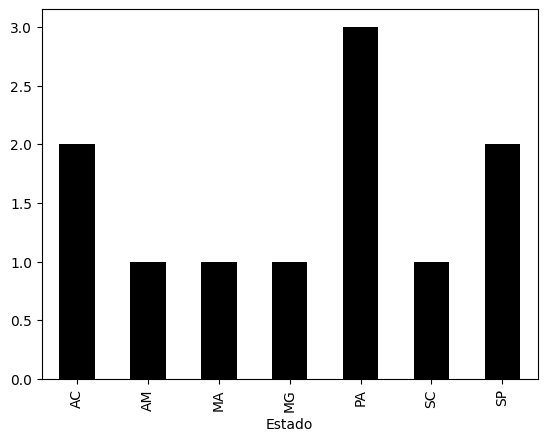

In [136]:
agp_e.plot.bar(color='black')

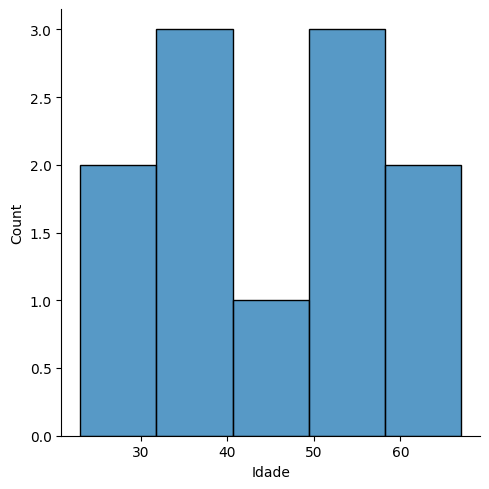

In [137]:
#df['Score'].describe()
srn.displot(df['Idade'])

In [138]:
#valores nan em Saldo e Salário
df.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              0
Idade               0
Patrimonio          0
Saldo               1
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             1
Saiu                0
dtype: int64

In [139]:
df['Saldo'].describe()

count       10.000000
mean     14860.800000
std      24982.838985
min          0.000000
25%         83.500000
50%       3160.000000
75%      19795.250000
max      77764.000000
Name: Saldo, dtype: float64

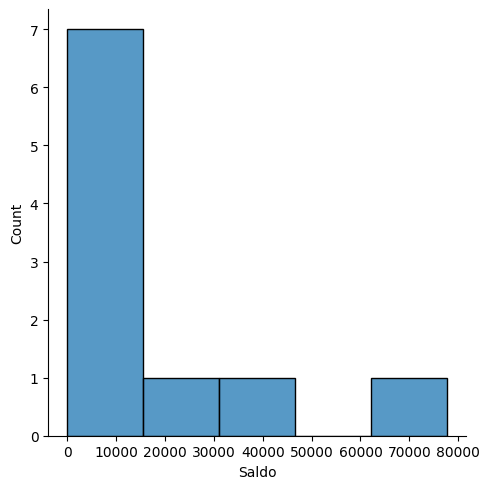

In [140]:
srn.displot(df['Saldo'])

In [141]:
# Tratamentos dos dados
#Remover NaN e subistituir pela mediana da coluna
import statistics as sts
mediana = sts.median(df['Saldo'])
mediana

5565.0

In [142]:
df['Saldo'].fillna(mediana,inplace=True)
df[['Saldo', 'Salario']].head(15)

,Saldo,Salario
0,0.0,234234.0
1,334.0,34345.0
2,24212.0,454.0
3,0.0,6456.0
4,6545.0,5345.0
5,77764.0,654332.0
6,755.0,756543.0
7,0.0,36544.0
8,33433.0,343675.0
9,5565.0,767544.0


In [143]:
mediana_salario = sts.median(df['Salario'])
mediana_salario

234234.0

In [144]:
df['Salario'].fillna(mediana_salario,inplace=True)
df[['Saldo', 'Salario']].head(15)

,Saldo,Salario
0,0.0,234234.0
1,334.0,34345.0
2,24212.0,454.0
3,0.0,6456.0
4,6545.0,5345.0
5,77764.0,654332.0
6,755.0,756543.0
7,0.0,36544.0
8,33433.0,343675.0
9,5565.0,767544.0


In [145]:
df.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              0
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             0
Saiu                0
dtype: int64

In [146]:
#Dados duplicados
df[df.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
9,10,802,PA,M,39,2,5565.0,1,1,1,767544.0,0
10,10,690,MA,F,40,1,5565.0,1,1,1,234234.0,0


In [152]:
#Atualizar valor em coluna
df.loc[(df['Id']==10) & (df['Estado']=='MA'), 'Id'] = '11'
df['Id'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, '11'], dtype=object)

In [153]:
#Substituir SC e MG pela moda
grupo_e = df.groupby(['Estado']).size()
grupo_e #PA é o Estado com mais clientes (3)

Estado
AC    2
AM    1
MA    1
MG    1
PA    3
SC    1
SP    2
dtype: int64

In [154]:
df.loc[df['Estado'].isin(['SC','MG']), 'Estado'] = 'PA'
grupo_e = df.groupby(['Estado']).size()
print(grupo_e)

Estado
AC    2
AM    1
MA    1
PA    5
SP    2
dtype: int64
